<a href="https://colab.research.google.com/github/sidvin101/interpretable-ml-2/blob/main/interpretable_ml_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #04
### Exploring and Demoing 3 IModels Algorithms
### Siddarth Vinnakota

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [123]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "interpretable-ml-2" # Change to your repo name
git_path = 'https://github.com/sidvin101/interpretable-ml-2' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'interpretable-ml-2'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 74.12 KiB | 798.00 KiB/s, done.
Resolving deltas: 100% (6/6), done.


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [104]:
pip install imodels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset, SkopeRulesClassifier, GreedyRuleListClassifier, FIGSClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import plot_tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
from IPython.display import Image, display

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
#Getting the dataset to be used
X, y, feature_names = get_clean_dataset('readmission_clean.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
#splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model 1: Skope Rules Classifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rules:
admission_source_id:Transfer <= 0.5 and number_inpatient <= 1.5 and number_inpatient > 0.5
number_inpatient <= 4.5 and number_inpatient > 1.5
discharge_disposition_id:Other <= 0.5 and number_inpatient > 1.5
discharge_disposition_id:Discharged to Home > 0.5 and number_inpatient > 1.5
admission_source_id:Emergency > 0.5 and number_inpatient <= 1.5 and number_inpatient > 0.5
number_diagnoses > 5.5 and number_emergency <= 0.5 and number_outpatient > 0.5
discharge_disposition_id:Discharged to Home > 0.5 and number_emergency <= 2.5 and number_emergency > 0.5
admission_source_id:Emergency <= 0.5 and number_inpatient <= 1.5 and number_inpatient > 0.5
number_diagnoses > 6.5 and number_inpatient <= 0.5 and number_outpatient > 0.5
discharge_disposition_id:Discharged to Home <= 0.5 and number_inpatient > 1.5
discharge_disposition_id:Other > 0.5 and number_inpatient > 1.5
number_diagnoses > 5.5 and number_emergency > 0.5 and number_inpatient <= 0.5
number_inpatient > 4.5
discharge_dispositio

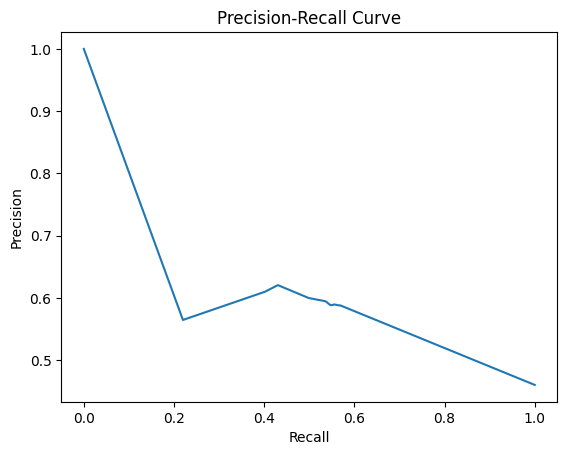

In [108]:
# Fit the model
model = SkopeRulesClassifier()
model.fit(X_train, y_train, feature_names=feature_names)

#Generate the predictions
y_preds = model.predict(X_test)
y_preds_proba = model.predict_proba(X_test)  #

# Print the rules
print("Rules:")
for rule in model.rules_:
    print(rule)


#Generate the precision and recall
y_score = model._score_top_rules(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


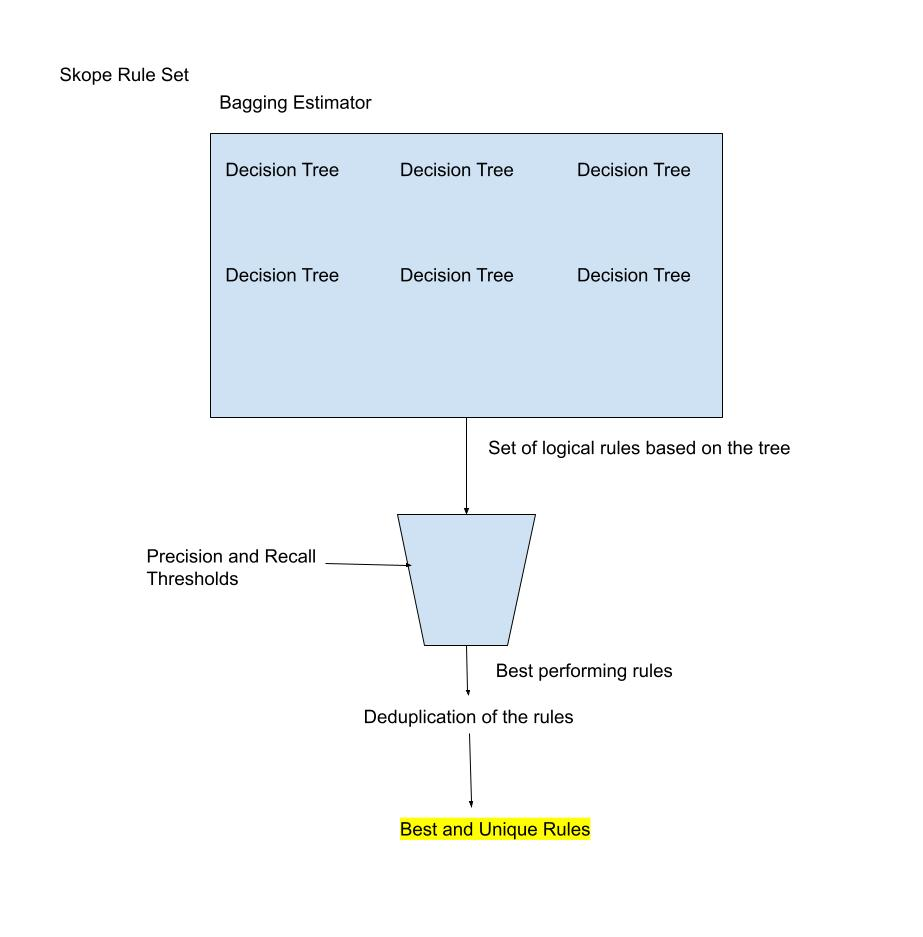

In [125]:
display(Image(filename='/content/interpretable-ml-2/visualizations/Skope Rule Set.jpg'))

# Model 2: Greedy Rule List

In [109]:
model = GreedyRuleListClassifier()
model.fit(X_train, y=y_train, feature_names=feature_names)
y_probs = model.predict_proba(X_test)

model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GreedyRuleListClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


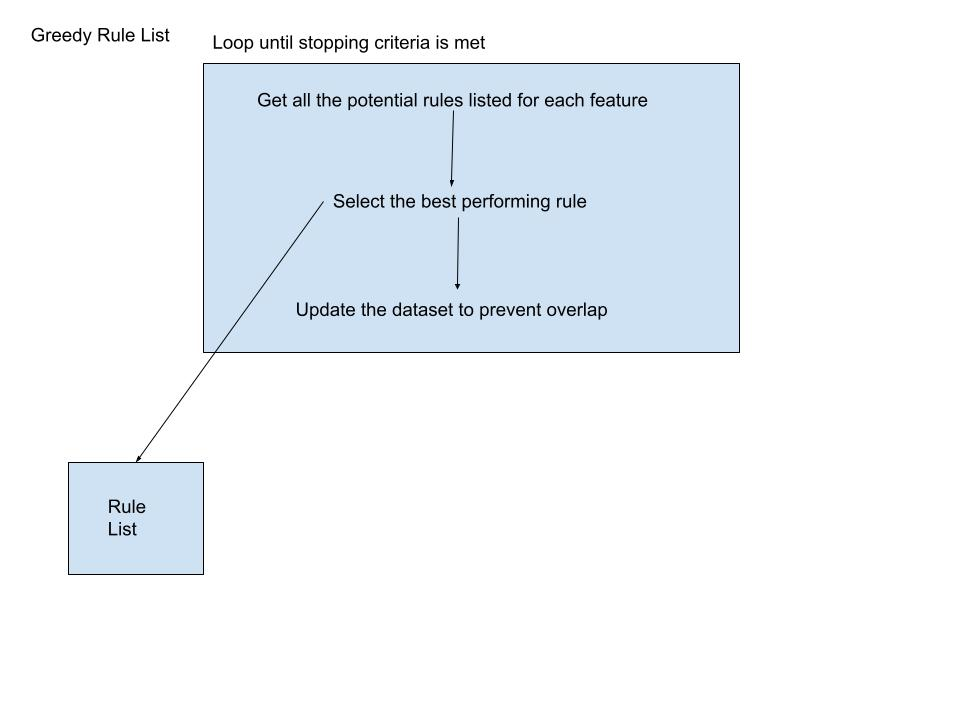

In [126]:
display(Image(filename='/content/interpretable-ml-2/visualizations/Greedy Rule List.jpg'))

# Model 3: Greedy Tree Sums (FIGS)

In [113]:
#Create a decision tree
model = FIGSClassifier(max_rules = 7)
model.fit(X_train, y_train, feature_names=feature_names)

#MSE
probs = model.predict_proba(X_test)

model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FIGSClassifier(max_rules=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


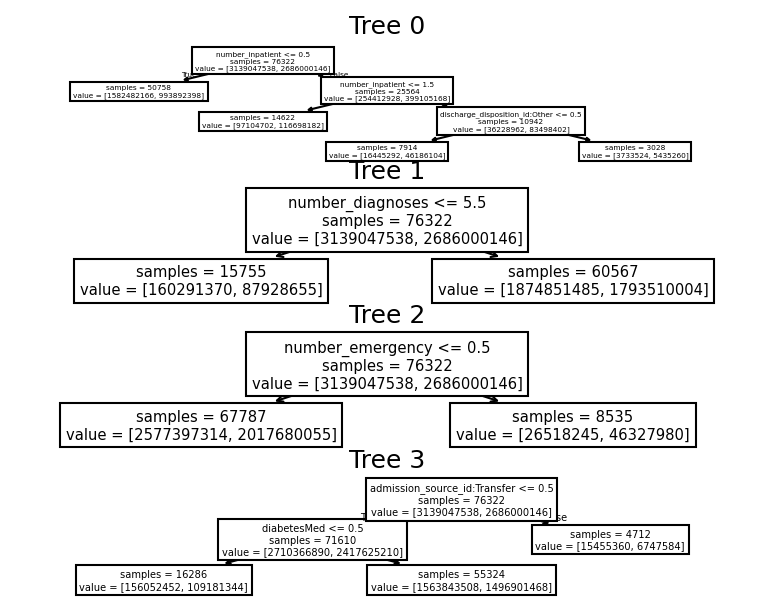

In [116]:
model.plot(feature_names = feature_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


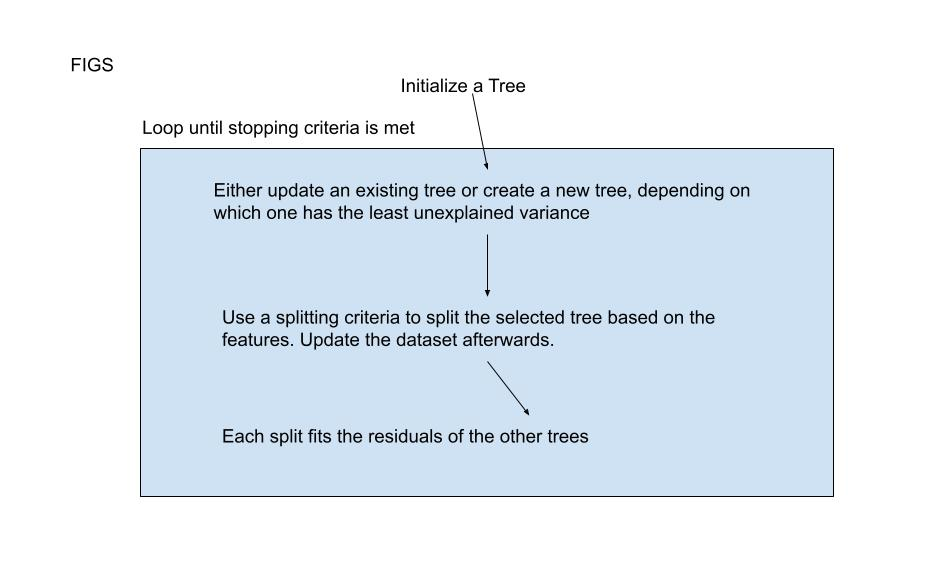

In [127]:
display(Image(filename='/content/interpretable-ml-2/visualizations/FIGS.jpg'))